#Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv("/content/Test.csv")
train_df = pd.read_csv("/content/Train.csv")
orignal_train_df = train_df.copy()
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#EDA & Preprocessing

##IDs

In [3]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


-Each record in data is identified by 'Item_Identifier' and 'Outlet_Identifier'

-To make things  easier both features will be dropped and will be replaced by unique identifier called 'id'

-The mapping between 'id' and ('Item_Identifier' , 'Outlet_Identifier') will be saved in seperate table

In [4]:
Identifiers_set = set()
for item_id , outlet_id in zip(train_df['Item_Identifier'].values , train_df['Outlet_Identifier'].values ):
  Identifiers_set.add((item_id , outlet_id))
print(f'Length of Identifiers_set = {len(Identifiers_set)} \nLength of data = {len(train_df)}')

Length of Identifiers_set = 8523 
Length of data = 8523


Number of Identifiers equals length of data as expected (else there would be duplicates or inconsistency)

In [5]:
ID_df = pd.DataFrame()
ID_df['ID'] = [i for i in range(len(train_df))]
ID_df['Item_Identifier'] = [i[0] for i in Identifiers_set ]
ID_df['Outlet_Identifier'] = [i[1] for i in Identifiers_set ]
ID_df.head()

,ID,Item_Identifier,Outlet_Identifier
0,0,FDT32,OUT017
1,1,NCY17,OUT045
2,2,FDV27,OUT019
3,3,FDC46,OUT013
4,4,FDL15,OUT049


In [6]:
train_df = train_df.merge(ID_df, on=['Item_Identifier' , 'Outlet_Identifier'])
train_df = train_df[['ID'] + list(train_df.columns.drop('ID'))].drop(['Item_Identifier' , 'Outlet_Identifier'] , axis =1)
train_df

,ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1193,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,7577,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,7997,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,7992,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8060,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,5949,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,2577,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,3029,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,1552,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


##Data types

In [7]:
# print("\n******** For Train data *********\n")
# print(train_df.info())
# print("\n******** For Test data *********\n")
# print(test_df.info())
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         8523 non-null   int64  
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 799.0+ KB


For data types, everything looks alright.

##Encoding

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         8523 non-null   int64  
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 799.0+ KB


In [9]:
categorical_features = list(train_df.select_dtypes('object').columns)
numerical_features = list(train_df.select_dtypes('int64').columns.drop('ID')) + list(train_df.select_dtypes('float64').columns.drop('Item_Outlet_Sales')) 
categorical_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

###Item_Fat_Content

In [10]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


-The data is inconsistent as low fat is represeted by different names such as 'Low Fat', 'LF' and 'low fat' and the same for regular fat, and these things should be considered in encoding

-Since the the data is ordinal, then label encoding will do

-Low fat will be 0 and regular fat will be 1






In [11]:
item_fat_replace_dict = {
    'Low Fat' : 0,
    'LF'      : 0,
    'low fat' : 0,
    'Regular' : 1,
    'reg'     : 1
}

train_df['Item_Fat_Content'].replace(item_fat_replace_dict, inplace= True)
train_df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

###Item_Type

In [12]:
train_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

-Since this feature has multiple categories and they are nominal, then this feature should be one hot encoded

In [13]:
train_df = pd.get_dummies(train_df, columns = ['Item_Type'])
train_df.head()

,ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,1193,9.30,0,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,7577,5.92,1,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,7997,17.50,0,0.016760,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,7992,19.20,1,0.000000,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,8060,8.93,0,0.000000,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,...,0,0,0,1,0,0,0,0,0,0


###Outlet_size

In [14]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

-Since Data is ordinal, then it will be label encoded

-Small will be 0, Medium will be 1 and High will be 2

In [15]:
outlet_size_replace_dict = {
    'Small'   : 0,
    'Medium'  : 1,
    'High'    : 2
}

train_df['Outlet_Size'].replace(outlet_size_replace_dict, inplace= True)
train_df['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

###Outlet_Location_Type

In [16]:
train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

-Location type has 3 tiers, so it's ordinal data so it will be label encoded

In [17]:
outlet_location_type_replace_dict = {
    'Tier 1'  : 0,
    'Tier 2'  : 1,
    'Tier 3'  : 2
}

train_df['Outlet_Location_Type'].replace(outlet_location_type_replace_dict, inplace= True)
train_df['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

###Outlet_Type

In [18]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

-This feature is nominal, so it will be one-hot encoded

In [19]:
train_df = pd.get_dummies(train_df, columns = ['Outlet_Type'])
train_df.head()

,ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1193,9.30,0,0.016047,249.8092,1999,1.0,0,3735.1380,0,...,0,0,0,0,0,0,0,1,0,0
1,7577,5.92,1,0.019278,48.2692,2009,1.0,2,443.4228,0,...,0,0,0,0,1,0,0,0,1,0
2,7997,17.50,0,0.016760,141.6180,1999,1.0,0,2097.2700,0,...,1,0,0,0,0,0,0,1,0,0
3,7992,19.20,1,0.000000,182.0950,1998,NaN,2,732.3800,0,...,0,0,0,0,0,0,1,0,0,0
4,8060,8.93,0,0.000000,53.8614,1987,2.0,2,994.7052,0,...,0,0,0,0,0,0,0,1,0,0


##missing Values

In [20]:
print(orignal_train_df.isnull().sum())
print("\nNull percentage for each attribute:")
print(f"\t 'Item_Weight' = {orignal_train_df['Item_Weight'].isnull().sum()/len(orignal_train_df)}% ")
print(f"\t 'Outlet_Size' = {orignal_train_df['Outlet_Size'].isnull().sum()/len(orignal_train_df)}% ")
print(f"\nThe number of records that have nulls in both 'Item_Weight' and 'Outlet_Size' = {len(orignal_train_df[(orignal_train_df['Item_Weight'].isna() == True) & (orignal_train_df['Outlet_Size'].isna() == True) ]  )}")

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Null percentage for each attribute:
	 'Item_Weight' = 0.1716531737651062% 
	 'Outlet_Size' = 0.2827642848762173% 

The number of records that have nulls in both 'Item_Weight' and 'Outlet_Size' = 0


-As shown the only columns have nulls are 'Item_Weight' and 'Outlet_Size'

-Each columns missing values represent about 17% and 28% respectively ,  percentage of the whole data and it's a high percentage so both each cannot be deleted and should be treated using imputation.

###Item_Weight & Outlet_Size

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64





Text(0.5, 1.0, 'After filling')

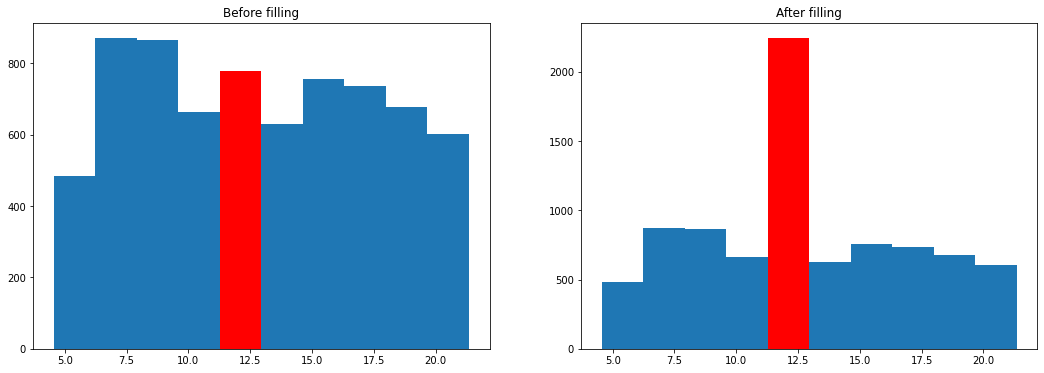

In [21]:
item_weight_mean = np.mean(orignal_train_df['Item_Weight'])
temp_item_weight = orignal_train_df['Item_Weight'].fillna(item_weight_mean)

print(orignal_train_df['Item_Weight'].describe())
print('\n\n')

fig , ax  = plt.subplots(1 , 2 , figsize = (18,6))
n , bin, patches = ax[0].hist(orignal_train_df['Item_Weight'] )
patches[4].set_fc('r')
n1 , bin1, patches1 = ax[1].hist(temp_item_weight)
patches1[4].set_fc('r')
ax[0].set_title('Before filling')
ax[1].set_title('After filling')

-As shown in figures, filling by mean or by median will not be accurate due to the high percentage of nulls so it's not the best way to treat 'Item_wieght' missing values.

-in this case KNN-based imputation will be suitable.

In [22]:
train_df

,ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1193,9.300,0,0.016047,249.8092,1999,1.0,0,3735.1380,0,...,0,0,0,0,0,0,0,1,0,0
1,7577,5.920,1,0.019278,48.2692,2009,1.0,2,443.4228,0,...,0,0,0,0,1,0,0,0,1,0
2,7997,17.500,0,0.016760,141.6180,1999,1.0,0,2097.2700,0,...,1,0,0,0,0,0,0,1,0,0
3,7992,19.200,1,0.000000,182.0950,1998,NaN,2,732.3800,0,...,0,0,0,0,0,0,1,0,0,0
4,8060,8.930,0,0.000000,53.8614,1987,2.0,2,994.7052,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,5949,6.865,0,0.056783,214.5218,1987,2.0,2,2778.3834,0,...,0,0,0,1,0,0,0,1,0,0
8519,2577,8.380,1,0.046982,108.1570,2002,NaN,1,549.2850,1,...,0,0,0,0,0,0,0,1,0,0
8520,3029,10.600,0,0.035186,85.1224,2004,0.0,1,1193.1136,0,...,0,0,0,0,0,0,0,1,0,0
8521,1552,7.210,1,0.145221,103.1332,2009,1.0,2,1845.5976,0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean'  )
imputed_values = imputer.fit_transform(train_df.drop('ID' , axis =1))
imputed_df = pd.DataFrame(imputed_values , columns = train_df.columns.drop('ID'))
imputed_df['ID'] = train_df['ID']
train_df = imputed_df
print(f' total number in missing values now in dataset = {train_df.isnull().sum().sum()}')
print("\n\n")
train_df.head()

 total number in missing values now in dataset = 0





,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ID
0,9.30,0.0,0.016047,249.8092,1999.0,1.0,0.0,3735.1380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1193
1,5.92,1.0,0.019278,48.2692,2009.0,1.0,2.0,443.4228,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7577
2,17.50,0.0,0.016760,141.6180,1999.0,1.0,0.0,2097.2700,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7997
3,19.20,1.0,0.000000,182.0950,1998.0,0.4,2.0,732.3800,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7992
4,8.93,0.0,0.000000,53.8614,1987.0,2.0,2.0,994.7052,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8060


In [24]:
train_df['Outlet_Size'].value_counts()

1.0    2985
0.0    2670
2.0     932
0.6     599
0.4     516
0.8     413
0.2     309
1.2      70
1.4      24
1.6       5
Name: Outlet_Size, dtype: int64

-The feature 'Outlet_Size' was label encoded but after imputation,fraction values have appeared such as 0.6, 1.2 and so on.

-These fraction values could be rounded but I see it's better to let them as they are

##Adjusting Data types After Encoding & Imputation

In [25]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ID
0,9.30,0.0,0.016047,249.8092,1999.0,1.0,0.0,3735.1380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1193
1,5.92,1.0,0.019278,48.2692,2009.0,1.0,2.0,443.4228,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7577
2,17.50,0.0,0.016760,141.6180,1999.0,1.0,0.0,2097.2700,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7997
3,19.20,1.0,0.000000,182.0950,1998.0,0.4,2.0,732.3800,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7992
4,8.93,0.0,0.000000,53.8614,1987.0,2.0,2.0,994.7052,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8060


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   float64
 5   Outlet_Size                      8523 non-null   float64
 6   Outlet_Location_Type             8523 non-null   float64
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Item_Type_Baking Goods           8523 non-null   float64
 9   Item_Type_Breads                 8523 non-null   float64
 10  Item_Type_Breakfast              8523 non-null   float64
 11  Item_Type_Canned                 8523 non-null   float64
 12  Item_Type_Dairy     

In [27]:
for col in train_df.columns:
  print(col)

Item_Weight
Item_Fat_Content
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Item_Outlet_Sales
Item_Type_Baking Goods
Item_Type_Breads
Item_Type_Breakfast
Item_Type_Canned
Item_Type_Dairy
Item_Type_Frozen Foods
Item_Type_Fruits and Vegetables
Item_Type_Hard Drinks
Item_Type_Health and Hygiene
Item_Type_Household
Item_Type_Meat
Item_Type_Others
Item_Type_Seafood
Item_Type_Snack Foods
Item_Type_Soft Drinks
Item_Type_Starchy Foods
Outlet_Type_Grocery Store
Outlet_Type_Supermarket Type1
Outlet_Type_Supermarket Type2
Outlet_Type_Supermarket Type3
ID


In [28]:
for col in train_df.columns.drop('ID'):
  print(f"'{col}' unique values are : {train_df[col].unique()}")

'Item_Weight' unique values are : [ 9.3    5.92  17.5   ... 12.345 13.135 14.119]
'Item_Fat_Content' unique values are : [0. 1.]
'Item_Visibility' unique values are : [0.0160473  0.01927822 0.01676007 ... 0.03518627 0.14522065 0.04487828]
'Item_MRP' unique values are : [249.8092  48.2692 141.618  ...  57.5904 214.5218  75.467 ]
'Outlet_Establishment_Year' unique values are : [1999. 2009. 1998. 1987. 1985. 2002. 2007. 1997. 2004.]
'Outlet_Size' unique values are : [1.  0.4 2.  0.8 0.  0.6 0.2 1.2 1.4 1.6]
'Outlet_Location_Type' unique values are : [0. 2. 1.]
'Item_Outlet_Sales' unique values are : [3735.138   443.4228 2097.27   ... 7182.6504 3608.636  2778.3834]
'Item_Type_Baking Goods' unique values are : [0. 1.]
'Item_Type_Breads' unique values are : [0. 1.]
'Item_Type_Breakfast' unique values are : [0. 1.]
'Item_Type_Canned' unique values are : [0. 1.]
'Item_Type_Dairy' unique values are : [1. 0.]
'Item_Type_Frozen Foods' unique values are : [0. 1.]
'Item_Type_Fruits and Vegetables' 

In [29]:
int_columns = train_df.columns.drop(['ID' ,'Item_Weight' , 'Item_Visibility' , 'Item_MRP' , 'Outlet_Size',
                                     'Item_Outlet_Sales'])
train_df[int_columns] = train_df[int_columns].astype('int64')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Outlet_Size                      8523 non-null   float64
 6   Outlet_Location_Type             8523 non-null   int64  
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Item_Type_Baking Goods           8523 non-null   int64  
 9   Item_Type_Breads                 8523 non-null   int64  
 10  Item_Type_Breakfast              8523 non-null   int64  
 11  Item_Type_Canned                 8523 non-null   int64  
 12  Item_Type_Dairy     

##Numerical Features Normalization

In [30]:
numerical_features

['Outlet_Establishment_Year', 'Item_Weight', 'Item_Visibility', 'Item_MRP']

In [31]:
train_df[numerical_features].describe()

,Outlet_Establishment_Year,Item_Weight,Item_Visibility,Item_MRP
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,1997.831867,12.842585,0.066132,140.992782
std,8.371760,4.314550,0.051598,62.275067
min,1985.000000,4.555000,0.000000,31.290000
25%,1987.000000,9.300000,0.026989,93.826500
50%,1999.000000,12.607000,0.053931,143.012800
75%,2004.000000,16.200000,0.094585,185.643700
max,2009.000000,21.350000,0.328391,266.888400


-All these features need to be normalized

In [32]:
from sklearn.preprocessing import MinMaxScaler
for feature in numerical_features:

  minmax_scale = MinMaxScaler(feature_range=(0,1))

  normalized_feature = minmax_scale.fit_transform(train_df[[feature]])

  train_df[feature] = normalized_feature

train_df[numerical_features].describe()



,Outlet_Establishment_Year,Item_Weight,Item_Visibility,Item_MRP
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.534661,0.493455,0.201382,0.465635
std,0.348823,0.256895,0.157123,0.264327
min,0.000000,0.000000,0.000000,0.000000
25%,0.083333,0.282525,0.082187,0.265437
50%,0.583333,0.479428,0.164228,0.474209
75%,0.791667,0.693361,0.288026,0.655156
max,1.000000,1.000000,1.000000,1.000000


##Outliers

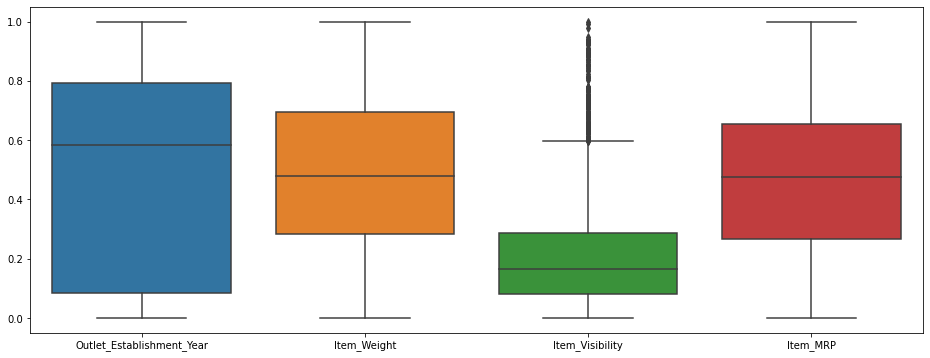

In [33]:
plt.figure(figsize=(16, 6))
sns.boxplot(data = train_df[numerical_features])

In [34]:
train_df['Item_Visibility'].describe()

count    8523.000000
mean        0.201382
std         0.157123
min         0.000000
25%         0.082187
50%         0.164228
75%         0.288026
max         1.000000
Name: Item_Visibility, dtype: float64

In [35]:
item_visibility_Q3 = train_df['Item_Visibility'].quantile(0.75)
item_visibility_Q1 = train_df['Item_Visibility'].quantile(0.25)
item_visibility_IQR = item_visibility_Q3 - item_visibility_Q1
item_visibility_Higher_limit = item_visibility_Q3 + item_visibility_IQR*1.5

print(f"'Item_Visibility' outliers percentage = {train_df[train_df['Item_Visibility'] > item_visibility_Higher_limit ]['Item_Visibility'].sum() / len(train_df)*100}%")


'Item_Visibility' outliers percentage = 1.2595323943505352%


These insights of 'Item_Visiblity' will be considered with any other insights will be got later

##Corelation Analysis

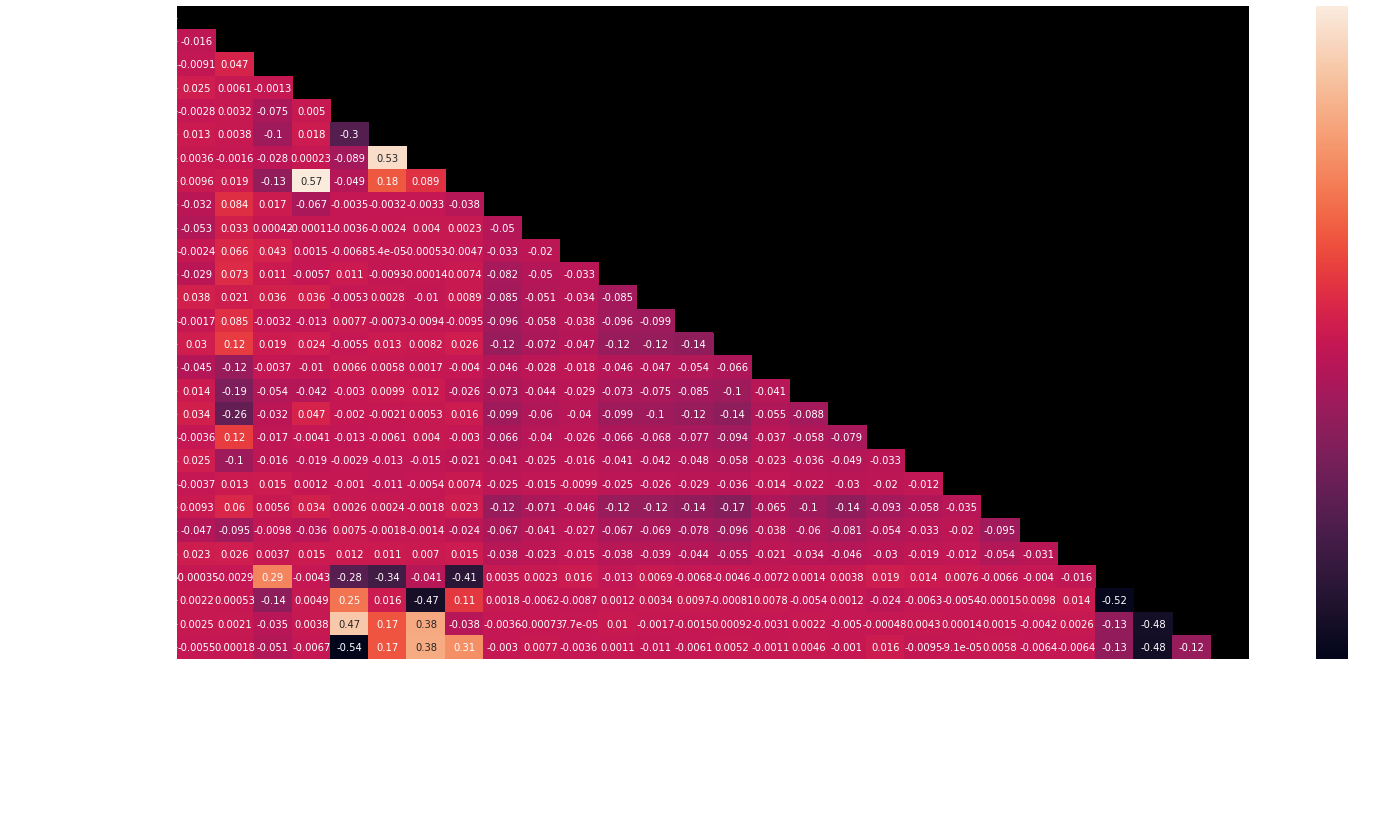

In [36]:
mask = np.zeros_like(train_df.drop('ID' , axis=1).corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True

plt.figure(figsize=(24, 12))
plt.style.use('dark_background')
sns.heatmap( train_df.drop('ID', axis=1).corr(),mask = mask , annot = True )
plt.show()

-There is no high correlation that makes us drop a feature, however, there are notable correlation between some features should be considered, such as:


*   'Item_Outlet_Sales' with 'Item_MRP' and 'outlet_type' and these are the most important relations
*   'Outlet_Location_Type' with 'Outlet_Type'
*   'Outlet_Establishment_Year' with 'Outlet_Type' 





#Modeling

Now Data is clean, encoded, normalized and ready for modeling

##Data Splitting

In [37]:
from sklearn.model_selection import train_test_split

target = 'Item_Outlet_Sales'

X = train_df.drop([target , 'ID'] , axis = 1)
y = train_df[target]

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.25)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((6392, 27), (2131, 27), (6392,), (2131,))

##Linear regression

In [38]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error

linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train , y_train)
print(f'Variance score: {linear_reg.score(X_test, y_test)}')
print(f'Root mean squared error : {mean_squared_error(y_test , linear_reg.predict(X_test) , squared=False)}')

Variance score: 0.5492548299452
Root mean squared error : 1137.590912842331


##Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
random_forest_params = {'bootstrap': [True, False],
 'max_depth': [10,  50, None],
 'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2],
#  'min_samples_split': [2, 5],
 'n_estimators': [100, 600]
 }

tuned_random_forest = GridSearchCV(RandomForestRegressor() ,random_forest_params )

tuned_random_forest.fit(X_train , y_train)

print(f'Variance score: {tuned_random_forest.score(X_test, y_test)}')
print(f'Root mean squared error : {mean_squared_error(y_test , tuned_random_forest.predict(X_test) , squared=False)}')




Variance score: 0.5892707757892418
Root mean squared error : 1085.9213600832788


##XGB

In [42]:
from xgboost.sklearn import XGBRegressor
XGB_model = XGBRegressor()
XGB_model.fit(X_train , y_train)
print(f'Variance score: {XGB_model.score(X_test, y_test)}')
print(f'Root mean squared error : {mean_squared_error(y_test , XGB_model.predict(X_test) , squared=False)}')

[15:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Variance score: 0.5925905206429265
Root mean squared error : 1081.5239425211164


In [ ]:
from xgboost.sklearn import XGBRegressor


XGB_params = {
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 7],
              'n_estimators': [100 , 500]
              }

tuned_XGB = GridSearchCV( ,XGB_params , verbose=True )

tuned_XGB.fit(X_train , y_train)

print(f'Variance score: {tuned_XGB.score(X_test, y_test)}')
print(f'Root mean squared error : {mean_squared_error(y_test , tuned_XGB.predict(X_test) , squared=False)}')

##Saving Models

In [45]:
import pickle
pickle.dump(linear_reg, open('linear_regression_model.pkl', 'wb'))
pickle.dump(tuned_random_forest, open('random_forest_model.pkl', 'wb'))
pickle.dump(XGB_model, open('XGB_model.pkl', 'wb'))

##Summary

There are 3 models applied on this data to predict sales and here is there results

*   For Linear Regression : RMSE = 1137.590912842331
*   For Random Forest     : RMSE = 1085.9213600832788
*   For XGBoost           : RMSE = 1081.5239425211164

